<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/AB_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A/B Testing on Marketing Campaigns

A fashion retail company is preparing to launch new product to their apparel catalog. Nevertheless, the management hasn't decided which one of three marketing campaigns in order to promote their new product. Therefore, they decide to disperse and introduce its new product in random selected outlets to examine which marketing campaigns has the substantial impact on product sales. So the company uses different approach of marketing campaigns for each outlets and new product is evaluated by assessing the weekly sales on this month (4 effective weeks).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('campaigns.csv')
df.head(10)

,OutletID,MarketSize,AgeofOutlets,Campaigns,Week,SalesInThousands
0,1,Medium,4,3,1,33.73
1,1,Medium,4,3,2,35.67
2,1,Medium,4,3,3,29.03
3,1,Medium,4,3,4,39.25
4,2,Medium,5,2,1,27.81
5,2,Medium,5,2,2,34.67
6,2,Medium,5,2,3,27.98
7,2,Medium,5,2,4,27.72
8,3,Medium,12,1,1,44.54
9,3,Medium,12,1,2,37.94


In [3]:
df.isnull().sum().sum()

0

In [4]:
print('\n\n\nSalam')




Salam


In [5]:
print(f'Rows            : {df.shape[0]}')
print(f'Columns         : {df.shape[1]}')
print(f'Features        : {df.columns.tolist()}')
print(f'Missing Values  : {df.isnull().values.sum()}')
print(f'Unique Values   : \n\n{df.nunique()}')

Rows            : 548
Columns         : 6
Features        : ['OutletID', 'MarketSize', 'AgeofOutlets', 'Campaigns', 'Week', 'SalesInThousands']
Missing Values  : 0
Unique Values   : 

OutletID            137
MarketSize            3
AgeofOutlets         25
Campaigns             3
Week                  4
SalesInThousands    517
dtype: int64


In [6]:
df.describe()

,OutletID,AgeofOutlets,Campaigns,Week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000
mean,479.656934,8.503650,2.029197,2.500000,53.466204
std,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,17.340000
25%,216.000000,4.000000,1.000000,1.750000,42.545000
50%,504.000000,7.000000,2.000000,2.500000,50.200000
75%,708.000000,12.000000,3.000000,3.250000,60.477500
max,920.000000,28.000000,3.000000,4.000000,99.650000


# EDA and Visualizations

In [7]:
df.head(2)

,OutletID,MarketSize,AgeofOutlets,Campaigns,Week,SalesInThousands
0,1,Medium,4,3,1,33.73
1,1,Medium,4,3,2,35.67


<Axes: ylabel='SalesInThousands'>

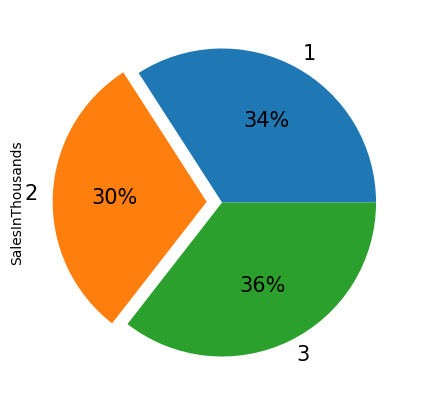

In [8]:
df.groupby('Campaigns').sum()['SalesInThousands'].plot.pie(figsize=(5,5),
                                                                autopct='%1.0f%%',
                                                                explode = (0, 0.1, 0),
                                                                textprops = {'fontsize' : 15})

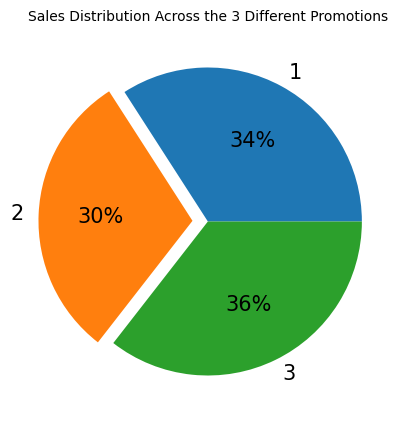

In [9]:
# Create some plots to visual our sales and marketing data
ax = df.groupby('Campaigns').sum()['SalesInThousands'].plot.pie(figsize=(5,5),
                                                                autopct='%1.0f%%',
                                                                explode = (0, 0.1, 0),
                                                                textprops = {'fontsize' : 15})
ax.set_ylabel('')
ax.set_title('Sales Distribution Across the 3 Different Promotions', fontsize = 10)

plt.show()

In [10]:
# Now let's view the promotions for each market size
df.groupby(['Campaigns', 'MarketSize']).count()['OutletID']

Campaigns  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: OutletID, dtype: int64

In [11]:
df.groupby(['Campaigns', 'MarketSize']).count()['OutletID'].reset_index()

,Campaigns,MarketSize,OutletID
0,1,Large,56
1,1,Medium,96
2,1,Small,20
3,2,Large,64
4,2,Medium,108
5,2,Small,16
6,3,Large,48
7,3,Medium,116
8,3,Small,24


In [12]:
# Using unstack
df.groupby(['Campaigns', 'MarketSize']).count()['OutletID'].unstack('MarketSize')

MarketSize,Large,Medium,Small
Campaigns,,,
1,56,96,20
2,64,108,16
3,48,116,24


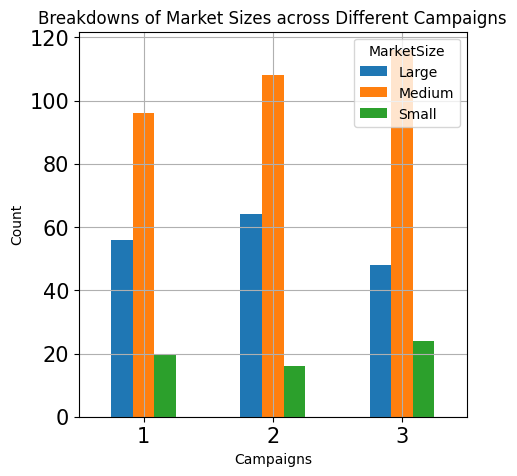

In [13]:
# Put this into a plot
ax = df.groupby(['Campaigns', 'MarketSize']).count()['OutletID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(5,5),
    grid=True)

ax.tick_params(axis = 'x', labelsize= 15)
plt.xticks(rotation = 'horizontal')
ax.tick_params(axis = 'y', labelsize = 15)
ax.set_ylabel('Count')
ax.set_title('Breakdowns of Market Sizes across Different Campaigns', fontsize = 12)

plt.show()

In [14]:
df.groupby('AgeofOutlets').count()['OutletID']

AgeofOutlets
1     80
2     20
3     32
4     44
5     44
6     36
7     40
8     40
9     28
10    24
11    16
12    24
13    20
14    12
15     8
17     4
18     8
19    20
20     4
22    12
23     8
24    12
25     4
27     4
28     4
Name: OutletID, dtype: int64

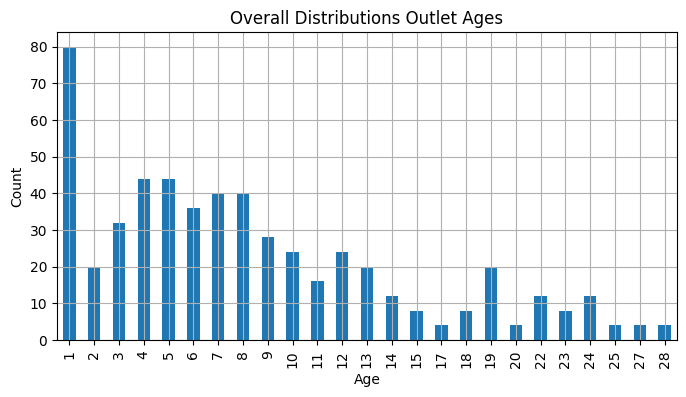

In [15]:
ax = df.groupby('AgeofOutlets').count()['OutletID'].plot(
    kind='bar',
    figsize=(8,4),
    grid=True)

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Overall Distributions Outlet Ages')

plt.show()

In [16]:
t = pd.DataFrame({'ad':['a', 'b', 'c'], 'yash':[11, 12, 13]})
t

,ad,yash
0,a,11
1,b,12
2,c,13


In [17]:
t.iloc[::-1]

,ad,yash
2,c,13
1,b,12
0,a,11


In [18]:
z = df.groupby(['AgeofOutlets', 'Campaigns']).count()['OutletID'].unstack('Campaigns')
z

Campaigns,1,2,3
AgeofOutlets,,,
1,24.0,36.0,20.0
2,8.0,8.0,4.0
3,16.0,12.0,4.0
4,16.0,12.0,16.0
5,8.0,12.0,24.0
6,20.0,4.0,12.0
7,4.0,24.0,12.0
8,12.0,8.0,20.0
9,8.0,12.0,8.0


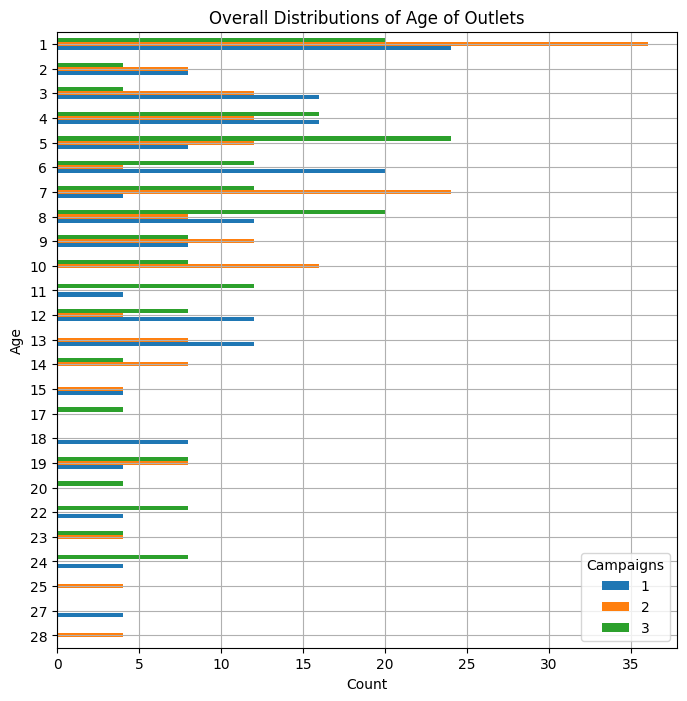

In [19]:
# Visualize this summary
ax = df.groupby(['AgeofOutlets', 'Campaigns']).count()['OutletID'].unstack('Campaigns').iloc[::-1].plot(
    kind='barh',
    figsize=(8,8),
    grid=True)

ax.set_ylabel('Age')
ax.set_xlabel('Count')
ax.set_title('Overall Distributions of Age of Outlets')

plt.show()

In [20]:
# Every campaigns has similar age profiles and the average outlet ages is around 8 ~ 9 years old
# Majority of the outlet are around 10 ~ 12 years old or younger

df.groupby('Campaigns').describe()['AgeofOutlets']

,count,mean,std,min,25%,50%,75%,max
Campaigns,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


# Performing A/B Testing on Three Marketing Campaigns

In [21]:
df

,OutletID,MarketSize,AgeofOutlets,Campaigns,Week,SalesInThousands
0,1,Medium,4,3,1,33.73
1,1,Medium,4,3,2,35.67
2,1,Medium,4,3,3,29.03
3,1,Medium,4,3,4,39.25
4,2,Medium,5,2,1,27.81
...,...,...,...,...,...,...
543,919,Large,2,1,4,64.34
544,920,Large,14,2,1,50.20
545,920,Large,14,2,2,45.75
546,920,Large,14,2,3,44.29


In [22]:
 df[['Campaigns','AgeofOutlets']]

,Campaigns,AgeofOutlets
0,3,4
1,3,4
2,3,4
3,3,4
4,2,5
...,...,...
543,1,2
544,2,14
545,2,14
546,2,14


In [23]:
df[['Campaigns', 'SalesInThousands']].groupby('Campaigns').mean()['SalesInThousands']

Campaigns
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

In [24]:
means =df[['Campaigns', 'SalesInThousands']].groupby('Campaigns').mean()['SalesInThousands']
stdev = df[['Campaigns', 'SalesInThousands']].groupby('Campaigns').std()['SalesInThousands']
obs = df[['Campaigns', 'SalesInThousands']].groupby('Campaigns').count()['SalesInThousands']
print(f'===== MEAN ====== \n{means}\n')
print(f'===== STANDARD DEVIATION ====== \n{stdev}\n')
print(f'===== OBSERVATIONS ====== \n{obs}\n')

===== MEAN ====== 
Campaigns
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

===== STANDARD DEVIATION ====== 
Campaigns
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64

===== OBSERVATIONS ====== 
Campaigns
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64



# A/B Testing: 1st Campaigns vs 2nd Campaigns

In [25]:
df.loc[df['Campaigns'] == 1, 'SalesInThousands'].values

array([44.54, 37.94, 45.49, 34.75, 42.92, 42.16, 51.72, 36.17, 37.41,
       38.64, 40.9 , 41.11, 35.85, 36.24, 41.73, 37.32, 50.48, 36.88,
       35.68, 46.45, 67.48, 65.57, 68.42, 60.93, 88.73, 85.21, 81.55,
       94.17, 93.71, 96.01, 93.03, 97.61, 85.11, 88.07, 94.43, 89.44,
       91.6 , 80.61, 93.86, 83.43, 99.65, 88.64, 86.96, 89.25, 87.08,
       89.32, 99.12, 85.85, 93.32, 85.71, 77.36, 91.29, 55.94, 61.36,
       56.19, 62.06, 54.01, 63.48, 61.96, 55.3 , 53.79, 66.96, 57.1 ,
       65.12, 62.16, 54.06, 51.72, 59.64, 49.95, 55.11, 55.28, 54.7 ,
       59.34, 62.63, 49.08, 58.04, 42.16, 36.8 , 46.98, 47.35, 40.46,
       41.25, 32.05, 47.5 , 35.3 , 35.86, 49.3 , 30.81, 44.98, 41.71,
       41.1 , 40.97, 41.1 , 41.56, 36.39, 39.67, 53.38, 55.31, 56.1 ,
       43.24, 48.18, 43.11, 43.78, 56.9 , 53.53, 47.92, 56.18, 46.66,
       42.76, 50.52, 56.86, 47.51, 51.82, 45.02, 49.44, 51.32, 52.85,
       40.84, 64.45, 44.43, 56.64, 46.06, 55.46, 51.41, 56.99, 45.57,
       45.92, 50.52,

In [26]:
# Computing the t and p values using scipy

t, p = stats.ttest_ind(df.loc[df['Campaigns'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Campaigns'] == 2, 'SalesInThousands'].values,
                       equal_var=False)
print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


In [27]:
"{:.8f}".format(float(str(p)))

'0.00000000'

# Analysis of P and t-values (1 vs 2)

Our p-Value is close to 0 which means that there is good evidence to **reject the null hypothesis**. Meaning the there is a statistical difference between the two groups. Our threshold rejectings the Null is usually less than 0.05.

Furthermore, the t-test shows that the marketing performances for these two groups are significantly different and that first marketing campaigns outperforms second marketing campaigns.

***

# A/B Testing: 1st Campaigns vs 3rd Campaigns

However, if we run a t-test between the promotion group 1 and promotion group 3, we see different results:

In [28]:
t, p = stats.ttest_ind(
    df.loc[df['Campaigns'] == 1, 'SalesInThousands'].values,
    df.loc[df['Campaigns'] == 3, 'SalesInThousands'].values,
    equal_var = False)

print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

t-value = 1.5560224307758634
p-value = 0.12059147742229478


# Analysis of P and t-values (1 vs 3)

We note that the average sales from first marketing campaigns (58.1) is higher than those from third marketing campaigns (55.36).
But, running a t-test between these two groups, gives us a t-value of 1.556 and a p-value of 0.121.
The computed **p-value is a lot higher than 0.05**, past the threshold for statistical significance.

the t-value is the computed statistic that measures the degree of deviation from the null hypothesis, while the p-value provides the probability of obtaining such a deviation (or more extreme) under the assumption that the null hypothesis is true.

***

# A/B Testing: 2nd Campaigns vs 3rd Campaigns

In [29]:
t, p = stats.ttest_ind(
    df.loc[df['Campaigns'] == 2, 'SalesInThousands'].values,
    df.loc[df['Campaigns'] == 3, 'SalesInThousands'].values,
    equal_var = False)

print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

t-value = -4.88139271089348
p-value = 1.5692733176039892e-06


In [30]:
"{:.8f}".format(float(str('1.5692733176039892e-06')))

'0.00000157'

# Analysis of P and t-values (2 vs 3)

Based on the average sales, second marketing campaigns (47.33) is higher than those from third marketing campaigns (55.36).
If we run the t-test and between these two campaigns, results shows that the p-value (0.000001569) is lower than 0.05 threshold, which concludes that it **rejects null hypotheses**. In other words, there's statistical difference between second marketing campaigns and third marketing campaigns.

#### Function

In [31]:
dt = pd.DataFrame({'Company':['Bakcell', 'Azercell', 'Nar Mobile'],
             'Sales in minute':[5000, 6000, 10000], 'Sales in internet':[2000, 1000, 4000]})
dt

,Company,Sales in minute,Sales in internet
0,Bakcell,5000,2000
1,Azercell,6000,1000
2,Nar Mobile,10000,4000


In [32]:
dt['Total sales'] = dt['Sales in minute'] + dt['Sales in internet']
dt

,Company,Sales in minute,Sales in internet,Total sales
0,Bakcell,5000,2000,7000
1,Azercell,6000,1000,7000
2,Nar Mobile,10000,4000,14000


In [33]:
dt['Company'][0]

'Bakcell'

In [34]:
dt['Total sales1'] = 0
for i in range(len(dt)):
    dt['Total sales1'][i] =  dt['Sales in minute'][i] +  dt['Sales in internet'][i]

<ipython-input-34-8e2443e3a455>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Total sales1'][i] =  dt['Sales in minute'][i] +  dt['Sales in internet'][i]
<ipython-input-34-8e2443e3a455>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Total sales1'][i] =  dt['Sales in minute'][i] +  dt['Sales in internet'][i]
<ipython-input-34-8e2443e3a455>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Total sales1'][i] =  dt['Sales i

In [35]:
dt

,Company,Sales in minute,Sales in internet,Total sales,Total sales1
0,Bakcell,5000,2000,7000,7000
1,Azercell,6000,1000,7000,7000
2,Nar Mobile,10000,4000,14000,14000


In [36]:
list1 = []
for min, int in zip(dt['Sales in minute'], dt['Sales in internet']):
    print(min + int)
    list1.append(min + int)

7000
7000
14000


In [37]:
dt['Total sales2'] = list1

In [38]:
dt

,Company,Sales in minute,Sales in internet,Total sales,Total sales1,Total sales2
0,Bakcell,5000,2000,7000,7000,7000
1,Azercell,6000,1000,7000,7000,7000
2,Nar Mobile,10000,4000,14000,14000,14000
